In [2]:
# Load the necessary libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the supermarket sales dataset
file_path = 'supermarket_sales - Sheet1.csv'
df = pd.read_csv(file_path, encoding='ascii')

# Display the head of the dataframe to understand its structure
print(df.head())

# Data Cleaning: Check for missing values
missing_values = df.isnull().sum()
print(missing_values)

# Data Transformation: Encoding categorical variables
# Encoding Gender and Customer type
df['Gender'] = df['Gender'].map({'Male': 1, 'Female': 0})
df['Customer type'] = df['Customer type'].map({'Member': 1, 'Normal': 0})

# Feature Engineering: Creating new features
# Sales per branch
sales_per_branch = df.groupby('Branch')['Total'].sum().reset_index()
print(sales_per_branch)

# Average gross income by product line
avg_gross_income = df.groupby('Product line')['gross income'].mean().reset_index()
print(avg_gross_income)

# Customer segmentation based on gender
customer_segmentation = df.groupby('Gender')['Customer type'].value_counts().unstack().fillna(0)
print(customer_segmentation)

    Invoice ID Branch       City Customer type  Gender  \
0  750-67-8428      A     Yangon        Member  Female   
1  226-31-3081      C  Naypyitaw        Normal  Female   
2  631-41-3108      A     Yangon        Normal    Male   
3  123-19-1176      A     Yangon        Member    Male   
4  373-73-7910      A     Yangon        Normal    Male   

             Product line  Unit price  Quantity   Tax 5%     Total       Date  \
0       Health and beauty       74.69         7  26.1415  548.9715   1/5/2019   
1  Electronic accessories       15.28         5   3.8200   80.2200   3/8/2019   
2      Home and lifestyle       46.33         7  16.2155  340.5255   3/3/2019   
3       Health and beauty       58.22         8  23.2880  489.0480  1/27/2019   
4       Sports and travel       86.31         7  30.2085  634.3785   2/8/2019   

    Time      Payment    cogs  gross margin percentage  gross income  Rating  
0  13:08      Ewallet  522.83                 4.761905       26.1415     9.1  
1  10:

       Payment       Total    Rating
0         Cash  112206.570  6.970058
1  Credit card  100767.072  7.003215
2      Ewallet  109993.107  6.947826


C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\3207754613.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Total', data=payment_analysis, palette='viridis')


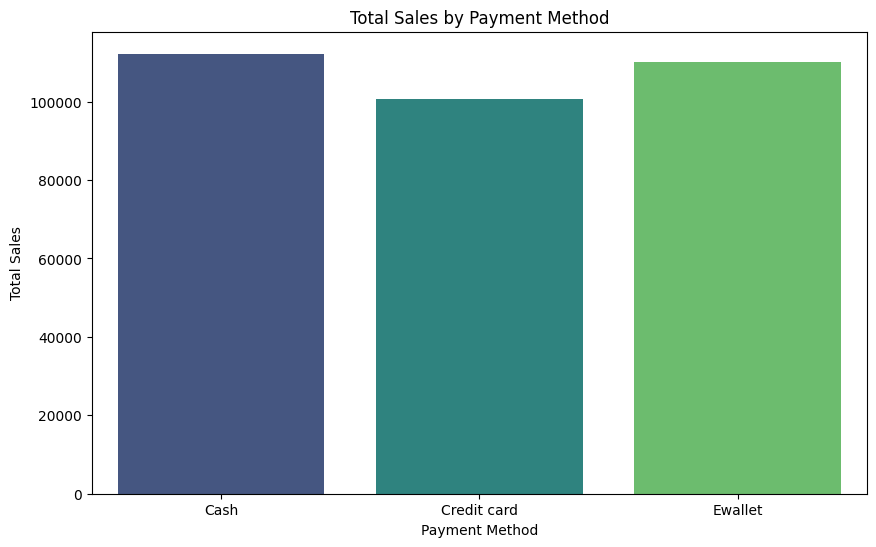

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\3207754613.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Payment', y='Rating', data=payment_analysis, palette='viridis')


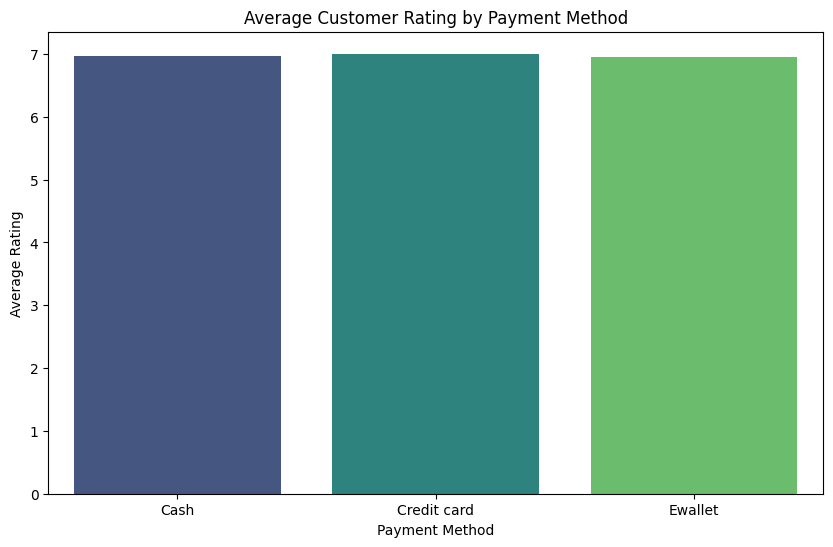

In [4]:
# Correcting the grouping by Payment method to calculate total sales and average ratings
# Grouping by Payment method to calculate total sales and average ratings
payment_analysis = df.groupby('Payment')[['Total', 'Rating']].agg({'Total': 'sum', 'Rating': 'mean'}).reset_index()

# Displaying the payment analysis results
print(payment_analysis)

# Visualizing the payment method analysis
plt.figure(figsize=(10, 6))
sns.barplot(x='Payment', y='Total', data=payment_analysis, palette='viridis')
plt.title('Total Sales by Payment Method')
plt.ylabel('Total Sales')
plt.xlabel('Payment Method')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Payment', y='Rating', data=payment_analysis, palette='viridis')
plt.title('Average Customer Rating by Payment Method')
plt.ylabel('Average Rating')
plt.xlabel('Payment Method')
plt.show()

  Branch       City        Total
0      A     Yangon  106200.3705
1      B   Mandalay  106197.6720
2      C  Naypyitaw  110568.7065


C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\4181342275.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Branch', y='Total', data=branch_performance, palette='coolwarm')


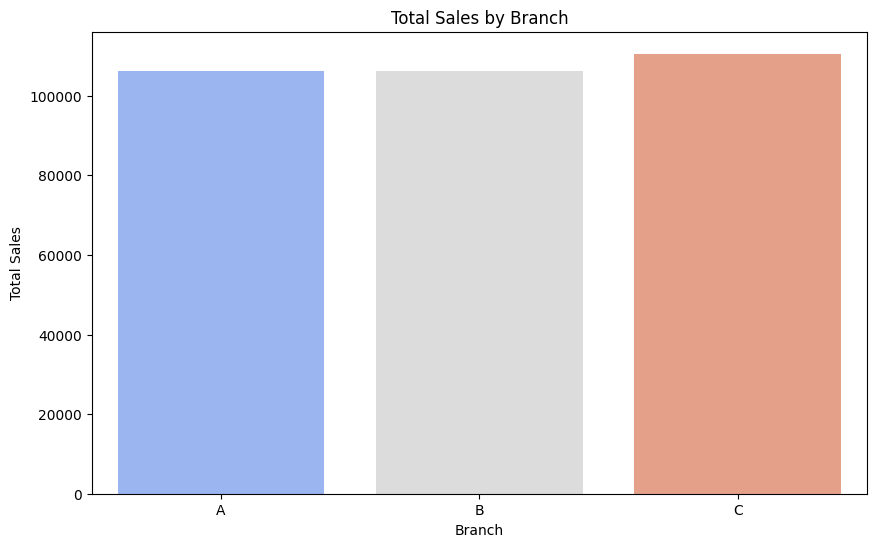

In [5]:
# Analyzing sales performance across different branches and cities
# Grouping by Branch and City to calculate total sales
branch_performance = df.groupby(['Branch', 'City'])['Total'].sum().reset_index()

# Displaying the branch performance results
print(branch_performance)

# Visualizing the branch performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Branch', y='Total', data=branch_performance, palette='coolwarm')
plt.title('Total Sales by Branch')
plt.ylabel('Total Sales')
plt.xlabel('Branch')
plt.show()

   Customer type       Total  gross income
0              0  158743.305      7559.205
1              1  164223.444      7820.164


C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\1338100460.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer type', y='Total', data=customer_type_performance, palette='magma')


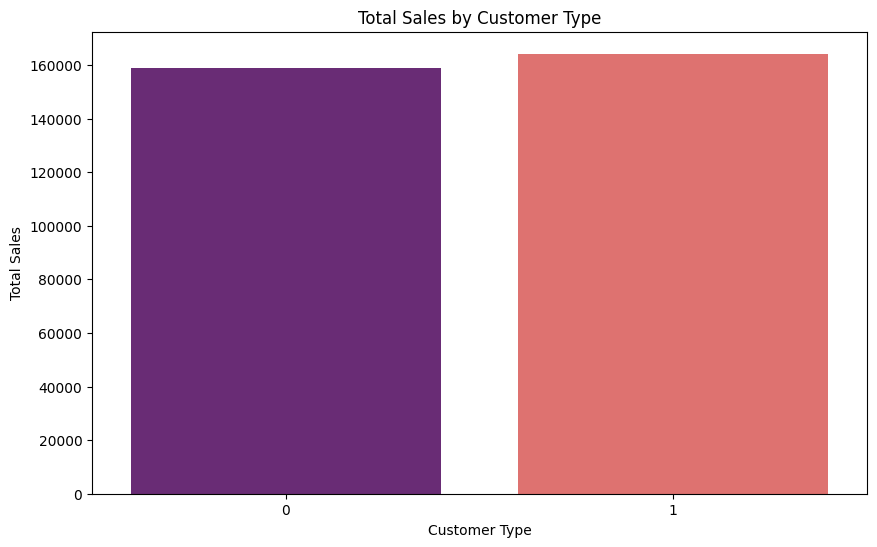

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\1338100460.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Customer type', y='gross income', data=customer_type_performance, palette='magma')


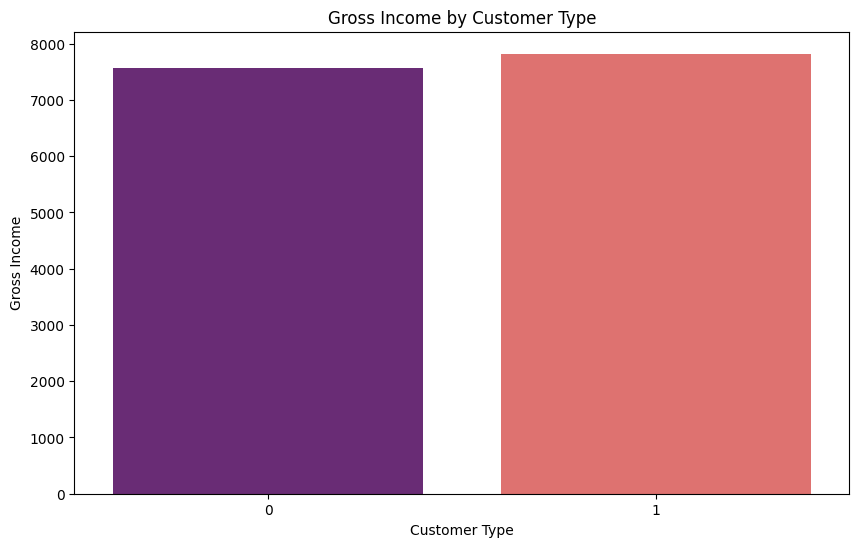

In [6]:
# Analyzing sales performance by customer type
# Grouping by Customer type to calculate total sales and gross income
customer_type_performance = df.groupby('Customer type')[['Total', 'gross income']].sum().reset_index()

# Displaying the customer type performance results
print(customer_type_performance)

# Visualizing the customer type performance
plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='Total', data=customer_type_performance, palette='magma')
plt.title('Total Sales by Customer Type')
plt.ylabel('Total Sales')
plt.xlabel('Customer Type')
plt.show()

plt.figure(figsize=(10, 6))
sns.barplot(x='Customer type', y='gross income', data=customer_type_performance, palette='magma')
plt.title('Gross Income by Customer Type')
plt.ylabel('Gross Income')
plt.xlabel('Customer Type')
plt.show()

             Product line       Total  gross income  Profit Margin %
0  Electronic accessories  54337.5315     2587.5015         4.761905
1     Fashion accessories  54305.8950     2585.9950         4.761905
2      Food and beverages  56144.8440     2673.5640         4.761905
3       Health and beauty  49193.7390     2342.5590         4.761905
4      Home and lifestyle  53861.9130     2564.8530         4.761905
5       Sports and travel  55122.8265     2624.8965         4.761905


C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\1091384466.py:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Total', data=product_line_performance, palette='crest')


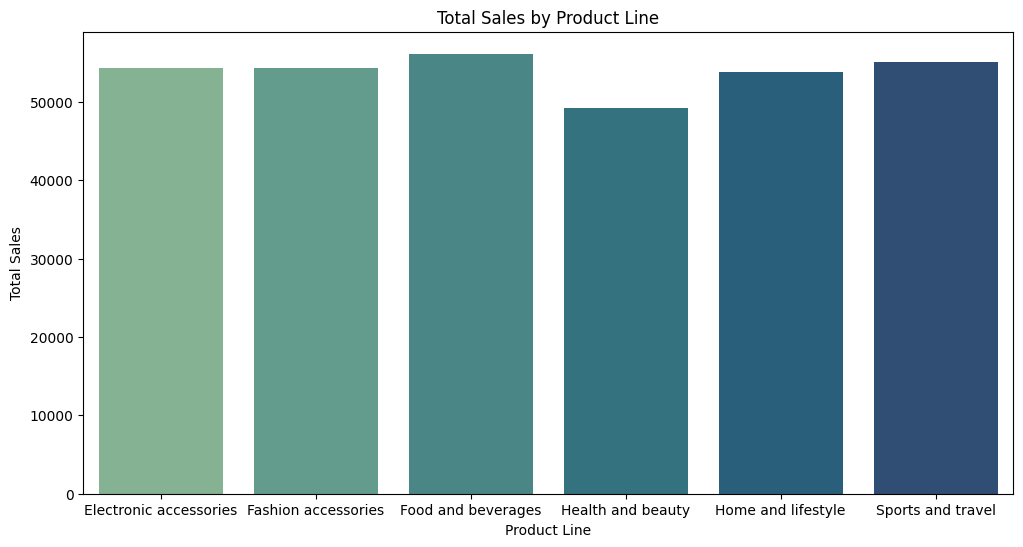

C:\Users\Aditya Deepak Patil\AppData\Local\Temp\ipykernel_20816\1091384466.py:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Product line', y='Profit Margin %', data=product_line_performance, palette='crest')


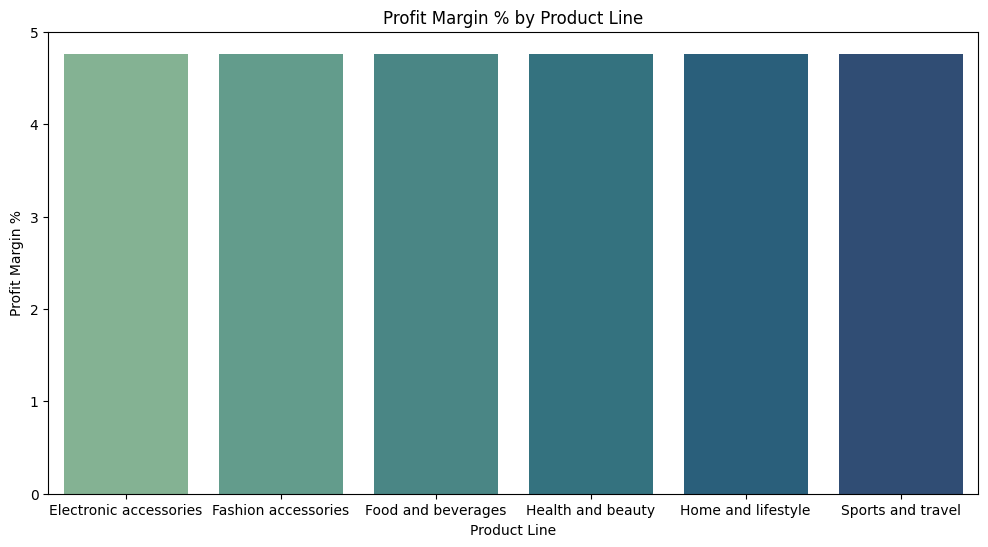

In [7]:
# Analyzing product line profitability
# Grouping by Product line to calculate total sales and gross income
product_line_performance = df.groupby('Product line')[['Total', 'gross income']].sum().reset_index()

# Calculating profit margin percentage for each product line
product_line_performance['Profit Margin %'] = (product_line_performance['gross income'] / product_line_performance['Total']) * 100

# Displaying the product line performance results
print(product_line_performance)

# Visualizing the product line performance
plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Total', data=product_line_performance, palette='crest')
plt.title('Total Sales by Product Line')
plt.ylabel('Total Sales')
plt.xlabel('Product Line')
plt.show()

plt.figure(figsize=(12, 6))
sns.barplot(x='Product line', y='Profit Margin %', data=product_line_performance, palette='crest')
plt.title('Profit Margin % by Product Line')
plt.ylabel('Profit Margin %')
plt.xlabel('Product Line')
plt.show()

In [8]:
# Calculating gross income and gross margin percentages for overall profitability
# Adding a new column for gross margin percentage in the original dataframe
# Gross margin percentage = (Gross Income / Total Sales) * 100

df['Gross Margin %'] = (df['gross income'] / df['Total']) * 100

# Calculating overall gross income and average gross margin percentage
overall_performance = df[['gross income', 'Gross Margin %']].agg({'gross income': 'sum', 'Gross Margin %': 'mean'}).reset_index()

# Displaying the overall performance results
print(overall_performance)

            index             0
0    gross income  15379.369000
1  Gross Margin %      4.761905


In [9]:
# Analyzing customer satisfaction ratings across different branches, product lines, and payment methods
# Grouping by Branch to calculate average ratings
branch_rating_analysis = df.groupby('Branch')['Rating'].mean().reset_index()

# Grouping by Product line to calculate average ratings
product_line_rating_analysis = df.groupby('Product line')['Rating'].mean().reset_index()

# Grouping by Payment method to calculate average ratings
payment_rating_analysis = df.groupby('Payment')['Rating'].mean().reset_index()

# Displaying the results
print(branch_rating_analysis)
print(product_line_rating_analysis)
print(payment_rating_analysis)

  Branch    Rating
0      A  7.027059
1      B  6.818072
2      C  7.072866
             Product line    Rating
0  Electronic accessories  6.924706
1     Fashion accessories  7.029213
2      Food and beverages  7.113218
3       Health and beauty  7.003289
4      Home and lifestyle  6.837500
5       Sports and travel  6.916265
       Payment    Rating
0         Cash  6.970058
1  Credit card  7.003215
2      Ewallet  6.947826
